In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
np.random.seed(2012)

# Configure visual settings:
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.style.use(['bmh'])

# Load the dataframe

data = pd.read_pickle('assets/training_data.p')

# Import lists of variable names
with open('var_names.p', 'rb') as f:
    target_variables, predictor_variables, categorical_variables, numerical_variables, text_variables, ordinal_variables = pickle.load(f)

In [2]:
# Subset small truck jobs
data = data[data['truck_type'] == 'Little']

# Drop 'rate' column
data.drop('rate', axis=1, inplace=True)
target_variables.remove('rate')
data.drop('index', axis=1, inplace=True)

In [3]:
assert data.isnull().sum().sum() == 0

In [4]:
data.reset_index(drop=True, inplace=True)

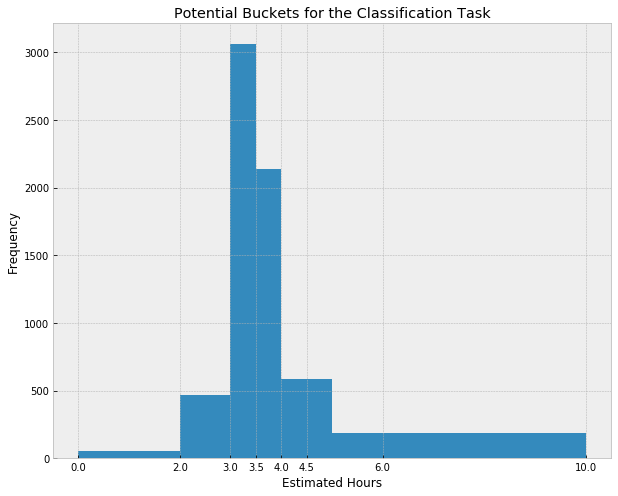

In [5]:
_ = data['est_hours'].plot(kind='hist', bins=[0,2,3,3.5,4,5,10])
_ = plt.xticks([0,2,3,3.5,4,4.5,6,10])
_ = plt.title('Potential Buckets for the Classification Task')
_ = plt.xlabel('Estimated Hours')

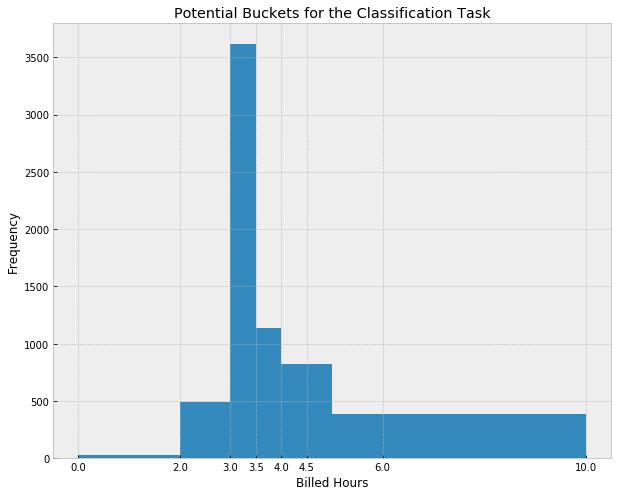

In [6]:
_ = data['cc_hours'].plot(kind='hist', bins=[0,2,3,3.5,4,5,10])
_ = plt.xticks([0,2,3,3.5,4,4.5,6,10])
_ = plt.title('Potential Buckets for the Classification Task')
_ = plt.xlabel('Billed Hours')

In [7]:
y = data['est_hours']
X = data.drop(target_variables, axis=1, inplace=False).select_dtypes(include=[np.number])

In [8]:
X.head()

,help_packing,boxes,loc1.lengthOfWalkOptID,loc1.sqFt,loc1.stairs,loc2.lengthOfWalkOptID,loc2.sqFt,loc2.stairs,driving_distance,loc1.elevatorType_Large,...,table,tall,trunk,tv,twin,unit,wall,wide,wood,wooden
0,0,5.5,3.0,750.0,0,3.0,3000.0,0,954.0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,5.5,2.0,700.0,0,2.0,700.0,0,281.0,0,...,3,0,0,0,0,0,0,0,0,0
2,1,15.0,4.0,690.0,0,4.0,620.0,0,1275.0,0,...,3,0,0,1,0,1,0,0,0,0
3,0,15.0,6.0,1.0,3,4.0,1800.0,3,772.0,0,...,3,1,0,2,0,0,0,0,0,0
4,0,5.5,4.0,900.0,0,5.0,410.0,0,1017.0,1,...,2,1,0,0,0,0,0,0,0,0


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X,y)

In [11]:
# Begin modeling!
from sklearn.ensemble import RandomForestRegressor

In [12]:
forest = RandomForestRegressor(max_depth=300)
forest.fit(X_train, y_train)
forest.score(X_val, y_val)

0.36659910511501415

In [13]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# param_grid = {'n_estimators':[300,500]}

# forest = RandomForestRegressor(max_features = None, max_depth = 50, n_estimators=300)

# grid_forest = GridSearchCV(forest, param_grid)

# grid_forest.fit(X_train, y_train)

# grid_forest.best_params_

# grid_forest.best_score_

In [ ]:
forest = RandomForestRegressor(max_features = None, max_depth = 50, n_estimators=300)
forest.fit(X_train, y_train)
forest.score(X_val, y_val)

In [ ]:
#

from sklearn.metrics import r2_score

In [ ]:
_ = sns.regplot(data=data, x='est_hours', y='cc_hours', ci=None)
_ = plt.title('Estimated Hours vs Billed Hours')
_ = plt.xlabel('Estimated Hours')
_ = plt.ylabel('Billed Hours')

In [ ]:
# Predicting hours billed:
y = data['cc_hours']
X = data.drop(target_variables, axis=1, inplace=False).select_dtypes(include=[np.number])
X_train, X_val, y_train, y_val = train_test_split(X,y)

# Using the same hyperparameters:
forest = RandomForestRegressor(max_features = None, max_depth = 50, n_estimators=300)
forest.fit(X_train, y_train)
forest.score(X_val, y_val)

# My R-squared:

In [ ]:
# R-squared score of human estimators:
r2_score(data['cc_hours'], data['est_hours'])

In [ ]:
y = (data['cc_hours'] - data['driving_distance']/60/60)/data['num_movers']
forest = RandomForestRegressor(max_features = None, max_depth = 50, n_estimators=300)
forest.fit(X_train, y_train)
forest.score(X_val, y_val)

In [ ]:
import pickle
with open('models/small_truck_model.p', 'wb') as f:
    pickle.dump(forest, f)

In [ ]:
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), forest.feature_importances_), X_train.columns), 
             reverse=True))